### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
# import pandas_datareader as pdr
# key=""

In [2]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404017,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [ ]:
# df.to_csv('AAPL.csv')

In [ ]:
# df=pd.read_csv('AAPL.csv')

In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421074,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798424,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771530,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191589,144114400


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404017,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [5]:
df1=df.reset_index()['Close']
df1.head()

0    7.643214
1    7.656429
2    7.534643
3    7.520714
4    7.570714
Name: Close, dtype: float64

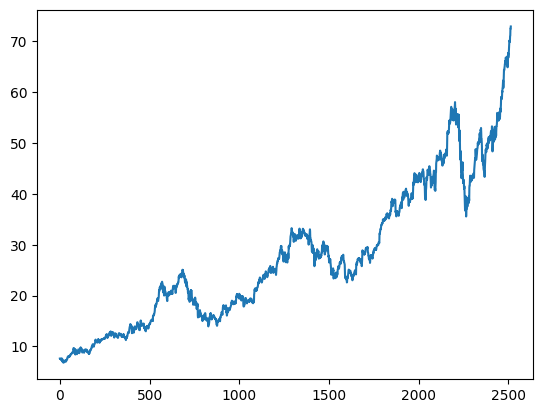

In [6]:
plt.plot(df.Close)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [7]:
df1

0        7.643214
1        7.656429
2        7.534643
3        7.520714
4        7.570714
          ...    
2510    71.000000
2511    71.067497
2512    72.477501
2513    72.449997
2514    72.879997
Name: Close, Length: 2515, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.01187932]
 [0.01207947]
 [0.01023482]
 ...
 [0.99390352]
 [0.99348692]
 [1.        ]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1634, 881)

In [14]:
train_data

array([[0.01187932],
       [0.01207947],
       [0.01023482],
       ...,
       [0.24463511],
       [0.25050443],
       [0.25357165]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1533, 100)
(1533,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
24/24 [==============================] - 11s 278ms/step - loss: 0.0042 - val_loss: 0.0136
Epoch 2/10
24/24 [==============================] - 4s 177ms/step - loss: 4.0291e-04 - val_loss: 0.0024
Epoch 3/10
24/24 [==============================] - 6s 233ms/step - loss: 2.5456e-04 - val_loss: 0.0032
Epoch 4/10
24/24 [==============================] - 4s 178ms/step - loss: 2.4509e-04 - val_loss: 0.0031
Epoch 5/10
24/24 [==============================] - 4s 178ms/step - loss: 2.5048e-04 - val_loss: 0.0031
Epoch 6/10
24/24 [==============================] - 6s 233ms/step - loss: 2.4885e-04 - val_loss: 0.0020
Epoch 7/10
24/24 [==============================] - 4s 178ms/step - loss: 2.3697e-04 - val_loss: 0.0024
Epoch 8/10
24/24 [==============================] - 5s 189ms/step - loss: 2.2085e-04 - val_loss: 0.0033
Epoch 9/10
24/24 [==============================] - 5s 211ms/step - loss: 2.1637e-04 - val_loss: 0.0021
Epoch 10/10
24/24 [==============================] - 4s 177ms/step 

In [25]:
model.save('keras_model.h5')

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.12.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 [==============================] - 1s 32ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.829822336240635

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

42.92564991891119

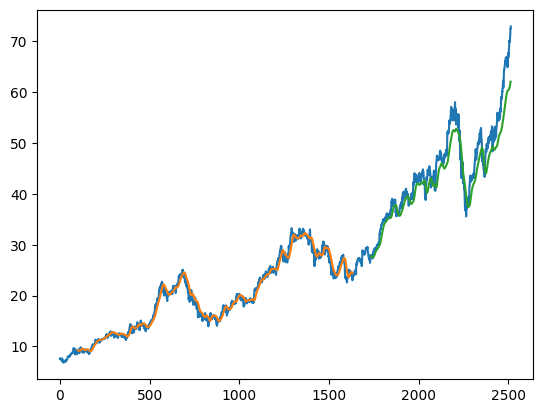

In [32]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

881

In [49]:
x_input=test_data[781:].reshape(1,-1)
x_input.shape


(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
temp_input

[0.6664322508021759,
 0.6571928244607871,
 0.6552615857655794,
 0.6874104351328685,
 0.6638573429152314,
 0.6600328269843285,
 0.6780573555329387,
 0.6926360582657846,
 0.6926739041652987,
 0.7013075072144649,
 0.7006259343432145,
 0.6634408069005786,
 0.6780195096334245,
 0.6691965615266892,
 0.6743842809800917,
 0.6875618765109244,
 0.6865395172040489,
 0.6750280079518279,
 0.688243507162174,
 0.7037309737233536,
 0.703655224144326,
 0.7071011077400895,
 0.7166813782971028,
 0.7427715325021704,
 0.7408781974864761,
 0.7244440634174493,
 0.7287987108415466,
 0.7318280584226573,
 0.7396664931220314,
 0.7328126296100178,
 0.7205816438070332,
 0.7243304679389075,
 0.7203922987494639,
 0.7330776664666154,
 0.7287608649420324,
 0.7247091580540461,
 0.7442104856036978,
 0.7465582025335591,
 0.7252392895472406,
 0.7322824981168234,
 0.7557219370759196,
 0.7559112821334889,
 0.7458387259827953,
 0.7557976866549472,
 0.7673848877061965,
 0.7905593475886943,
 0.7892718358652228,
 0.787189213571

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8431288]
101
1 day input [0.65719282 0.65526159 0.68741044 0.66385734 0.66003283 0.67805736
 0.69263606 0.6926739  0.70130751 0.70062593 0.66344081 0.67801951
 0.66919656 0.67438428 0.68756188 0.68653952 0.67502801 0.68824351
 0.70373097 0.70365522 0.70710111 0.71668138 0.74277153 0.7408782
 0.72444406 0.72879871 0.73182806 0.73966649 0.73281263 0.72058164
 0.72433047 0.7203923  0.73307767 0.72876086 0.72470916 0.74421049
 0.7465582  0.72523929 0.7322825  0.75572194 0.75591128 0.74583873
 0.75579769 0.76738489 0.79055935 0.78927184 0.78718921 0.78359183
 0.78703771 0.79131667 0.80684198 0.80475936 0.81695238 0.81846709
 0.8298271  0.83918018 0.81736892 0.81725533 0.83808201 0.86481595
 0.87117753 0.86977648 0.87019296 0.87848577 0.88117439 0.88897492
 0.88806604 0.89757062 0.89064107 0.90245546 0.90752958 0.90446239
 0.89272369 0.88825545 0.88738447 0.90476527 0.89688905 0.91033168
 0.90809756 0.89639676 0.87856158 0.88723297 0.90177377 0.92119941
 0.90684801 0.91275521 0.9214266  0

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

2515

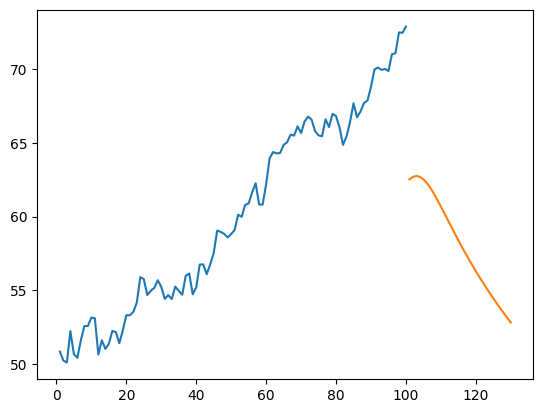

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[2415:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

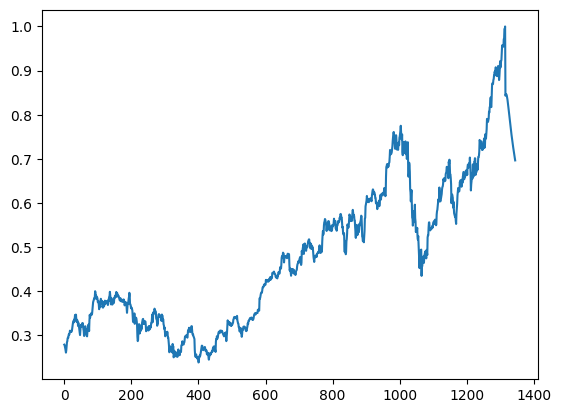

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

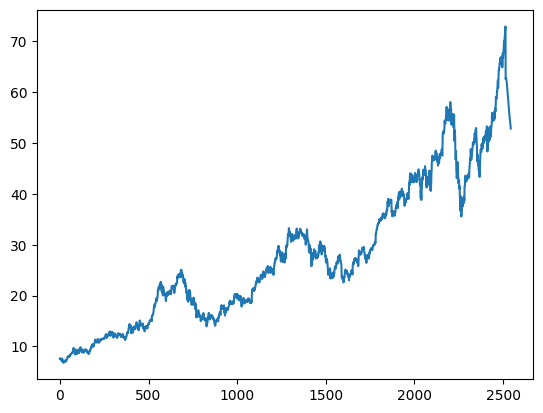

In [58]:
plt.plot(df3)